# Problem Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Problem Statement

**Objectives**

The classification goal is to predict the likelihood of a liability customer buying a personal loan.

To determne the most significant variables that influence the loan purchase. 

To determine the segment of customers that should be targeted more.


# Data Description

The data contains the customer details from the campaign last year. The detailed data dictionary is given below.

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Importing the libraries required

In [18]:
##Connect to Google drive to read and write to files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
# To supress warnings
import warnings
warnings.filterwarnings('ignore') 


# Loading the dataset

In [20]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv")

# Overview of the dataset

**Understand the shape of the dataset**

In [21]:
data.shape

(5000, 14)

**View the first and last 5 rows of the dataset**.¶

In [22]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Check the data types of the columns for the dataset.**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the columns are numeric and there seem to be no missing values.

The ID column has all unique values. It will not add any predictive power to the machine learning model, and can hence be dropped.


**Confirming that there are no missing values**

In [25]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No missing values found in the data

**Checking for duplicates**

In [26]:
data.duplicated().sum()

0

No duplicate values found in the data

**Dropping the columns with all unique values**

In [27]:
#Checking for number of unique values across all the columns
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [28]:
# ID column has all unique values, it will not add any predictive power to the machine learning model, and can hence be dropped.
data.drop('ID', axis=1, inplace=True)



ZipCode has 467 unique values. We have means to map the codes to counties/regions and that should bring down the categories. Let us decide if zipcode mapping adds value after conclusion of EDA.

Based on the number of unique values, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard seem to contain binary data.

In [29]:
binary_columns=['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for col in binary_columns:
  print(data[col].value_counts())

0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


**Columns containing Binary Data**

Personal Loan (Target Variable) : Did this customer accept the personal loan offered in the last campaign? (1 - Yes, 0 - No). **480 Customers seem to have accepted the loan offered in the previous campaign. Clearly, this is an imbalanced dataset with an unequal representation of classes.**

Securities Account : Does the customer have a securities account with the bank? (1 - Yes, 0 - No)

CD Account : Does the customer have a certificate of deposit (CD) account with the bank? (1 - Yes, 0 - No)

Online : Does the customer use internet banking facilities? (1 - Yes, 0 - No)

CreditCard : Does the customer use a credit card issued by an other Bank? (1 - Yes, 0 - No)



In [30]:
#Lets also take a quick look at the data in the Family & Education columns as they both have 4 and 3 unique values respectively.
print(data['Family'].value_counts())
print(data['Education'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


The Family column holds values 1,2,3 & 4. The Education column has values 1, 2 and 3.

# Statistical summary of the data

In [31]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


The average **age** of a customer is 45 and the minimum & maximum are 23 and 67 respectively.

The minimum **experience** of a customer is -3 which indicates presence of erroneous data. Maximum experience is 43 years. Mean and median are ~20.

The average annual **income** of a customer is approximately $73K. There is a wide range between the min and max values and there is a possibility of outliers in this column. 

There are 75% of the customers whose **family** size is less than or equal to 3.

Average credit card spending per month(**CCAvg**) ranges from 1- 10k with mean of 1.9kUSD and median of 1.5k USD. The difference between the 75% percentile and the max value is large indicating potential outliers.

when it comes to **education**, 50% of the customers seem to have a graduate degree or atleast an undergrad degree.

The average house **mortage** is 56K. This column has a wide range of values with a maximum of $635k and might possibly contain outliers.

**Securities_Account, CD_Account, Online, CreditCard** including the dependent/target variable, **Personal_Loan** seem to contain binary data. 


# Data Cleansing

In [32]:
#Let's investigate the negative values in the 'Experience' Column
print(data[data['Experience']<0]['Experience'].value_counts())

-1    33
-2    15
-3     4
Name: Experience, dtype: int64


We have 33 entries with -1 as the Experience, 15 rows with -2 as the Experience and another 4 rows with -3 as the Experience

In [33]:
# Lets look at the Age where the Experience is negative
data[data['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

We have a total of 52 rows where the 'Experience' column has a negative value. The average age of the customers with negative experience is 24.5. 75% of the customers with negative experience are in the 23 to 25 age group. So most likely the negative symbol was an error in data and so let's go ahead and use the absolute values.

In [34]:
#Converting the negative values in the Experience column to the corresponding positive values
data.loc[data['Experience']<0,'Experience']=np.abs(data['Experience'])

In [35]:
#Confirm that we no longer have negative values in the Experience column.
data['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

The minimum value in the Experience column is now 0.

# Univariate Analysis

Data distribution of all Independent Attributes

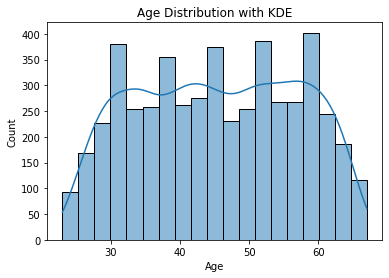

In [36]:
sns.histplot(data=data, x= 'Age', kde=True)
plt.title('Age Distribution with KDE');

The Age data seems to be normally distributed

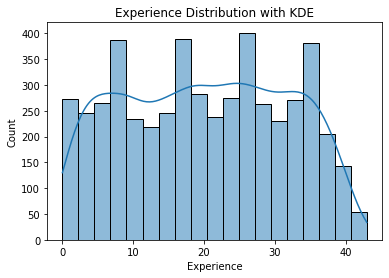

In [37]:
sns.histplot(data=data, x= 'Experience', kde=True)
plt.title('Experience Distribution with KDE');

Experience data seems to be normally distributed

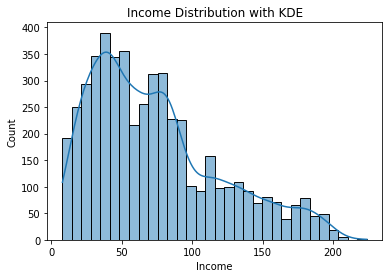

In [38]:
sns.histplot(data=data, x= 'Income', kde=True)
plt.title('Income Distribution with KDE');

Income data is skewed to the right. Indicates a positive skew.

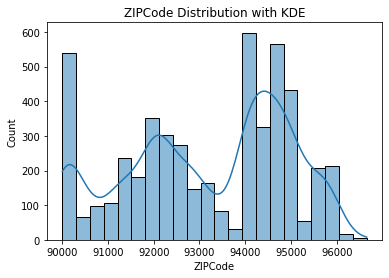

In [39]:
sns.histplot(data=data, x= 'ZIPCode', kde=True)
plt.title('ZIPCode Distribution with KDE');

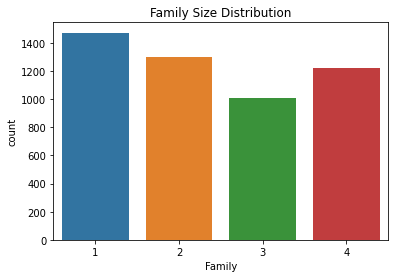

In [40]:
sns.countplot(data=data, x= 'Family')
plt.title('Family Size Distribution');

Customers with a family size of one seem to be more than familes made of 2, 3 or 4 members. Customers with a family size of 3 seem to be comparatively less than the rest.

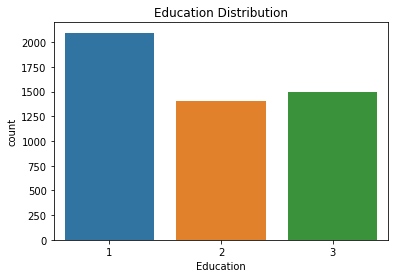

In [41]:
sns.countplot(data=data, x= 'Education')
plt.title('Education Distribution');

Customers with an Undergrad level of education seem to be more compared to the customers with Graduate and Advanced/Professional degrees.

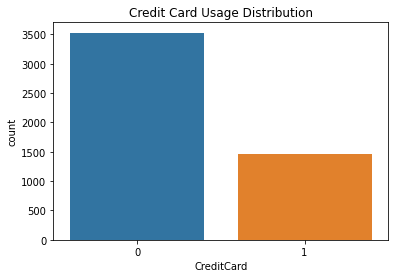

In [42]:
sns.countplot(data=data, x='CreditCard')
plt.title('Credit Card Usage Distribution');

Number of customers who do not use a credit card issued by an outside bank is almost double than those who do.

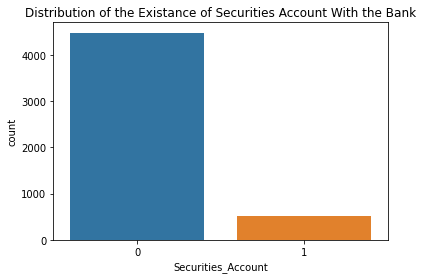

In [43]:
sns.countplot(data=data, x='Securities_Account')
plt.title('Distribution of the Existance of Securities Account With the Bank');

Most of the customers do not hold a securities account with the bank as compared to those who do.

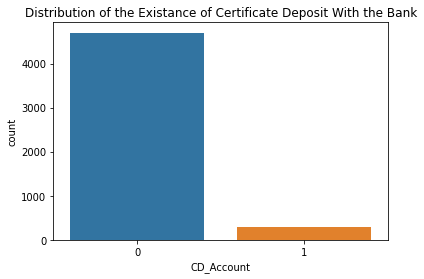

In [44]:
sns.countplot(data=data, x='CD_Account')
plt.title('Distribution of the Existance of Certificate Deposit With the Bank');

Most of the customers do not hold a CD account with the bank as compared to those who do.

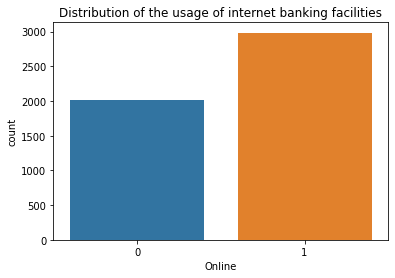

In [45]:
sns.countplot(data=data, x='Online')
plt.title('Distribution of the usage of internet banking facilities');

Number of customers who use the internet banking facilities provided by the bank is greater than those who do not.

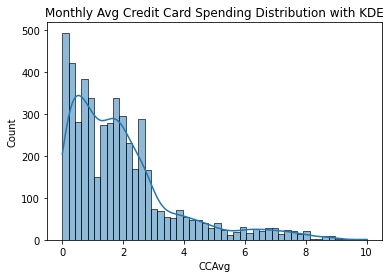

In [46]:
sns.histplot(data=data, x= 'CCAvg', kde=True)
plt.title('Monthly Avg Credit Card Spending Distribution with KDE');

Distribution for the CCAvg attribute is highly positively skewed 

Most of the customers monthly avg. spending on credit cards is between $0 to $2.5K. There are very few customers whose monthly avg. spending on credit card is > $8K.

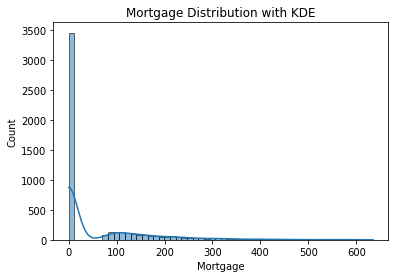

In [47]:
sns.histplot(data=data, x= 'Mortgage', kde=True)
plt.title('Mortgage Distribution with KDE');

The above distribution for the Mortgage attribute is highly positively skewed.
Most of the customers do not have any mortgage.
There are more customers whose mortgage amount is between 80k and 150k. There are a few that are greater than 600k.

# Data distribution of the dependent/target variable - Personal_Loan

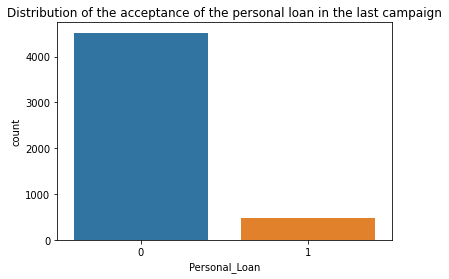

In [48]:
sns.countplot(data=data, x='Personal_Loan')
plt.title('Distribution of the acceptance of the personal loan in the last campaign');

The number of customers that accepted the personal loan in the previous campaign is significantly smaller compared to the customers who did not accept the loan.

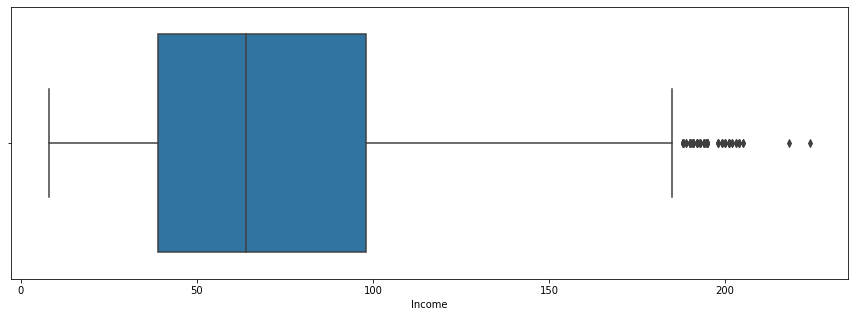

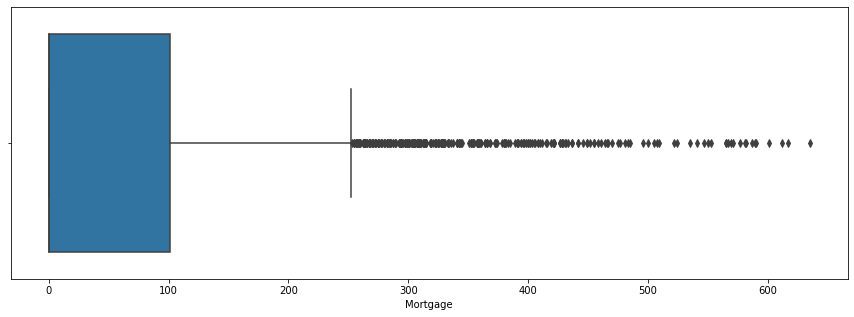

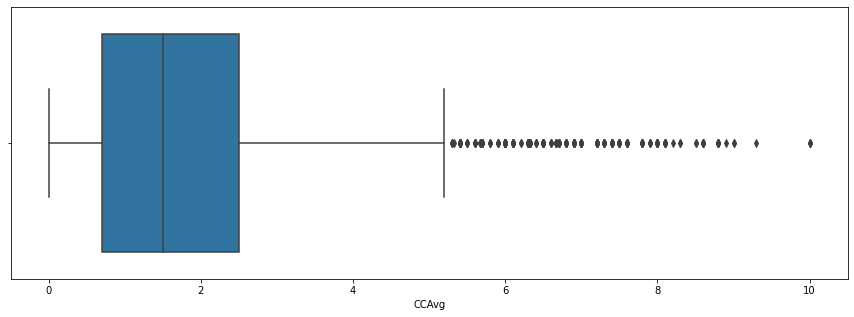

In [49]:
#Let's plot boxcharts for the variables that we suspect to contain outliers based on the statistical summary.
columns_with_potential_outliers =['Income', 'Mortgage','CCAvg']
for col in columns_with_potential_outliers:
  plt.figure(figsize=(15,5))
  sns.boxplot(data=data, x= col)
  plt.show()

The box charts prove the existance of outliers in the income, mortgage and monthly credit card spending. Outliers in these columns are expected and so they mostly are valid values and not errorenous. Hence not 'clipping' the values.

# Bivariate and Multivariate Analysis

Let us look at the correlation of the target variable, Personal_Loan with other variables.

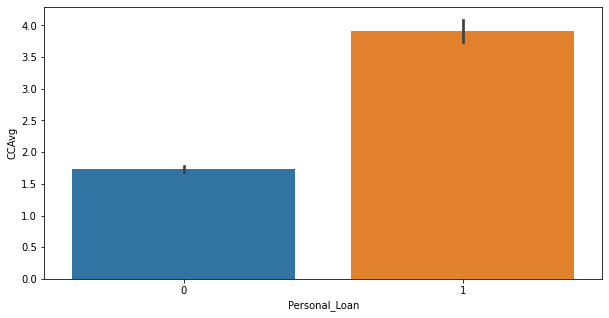

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x='Personal_Loan', y='CCAvg', data=data);

Customers who accepted the loan seem to have higher average monthly credit card spending than the customers who did not accept the loan.

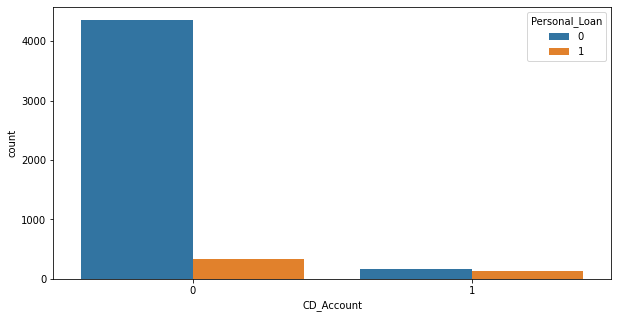

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='CD_Account', data=data, hue='Personal_Loan');

**It looks like almost all customers who have a CD Account with the bank have accepted the loan. Also majority of the customers do not have a CD Account with the bank and most of these customers did not accept the loan.**

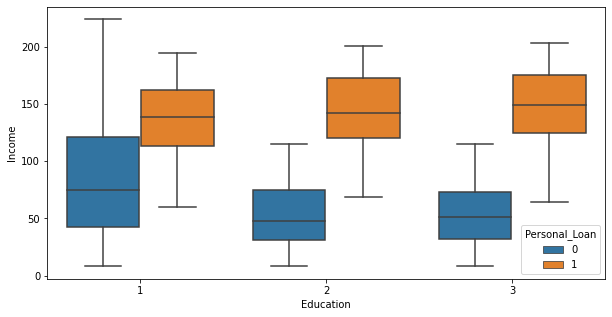

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Education', y='Income', hue='Personal_Loan', data=data);

Irrespective of the level of education, people with higher income seem to have accepted the loan.

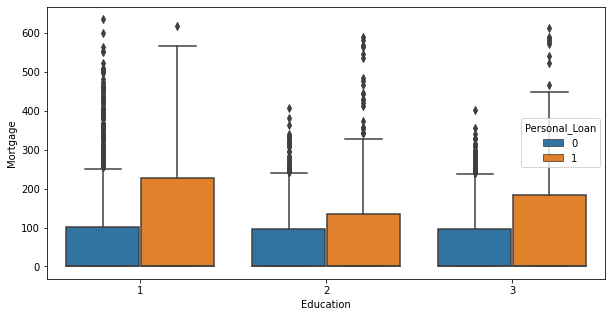

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Education', y='Mortgage', hue='Personal_Loan', data=data);

People with higher mortage seems to have accepted the loan compared to people with the same level of education but lower mortage.

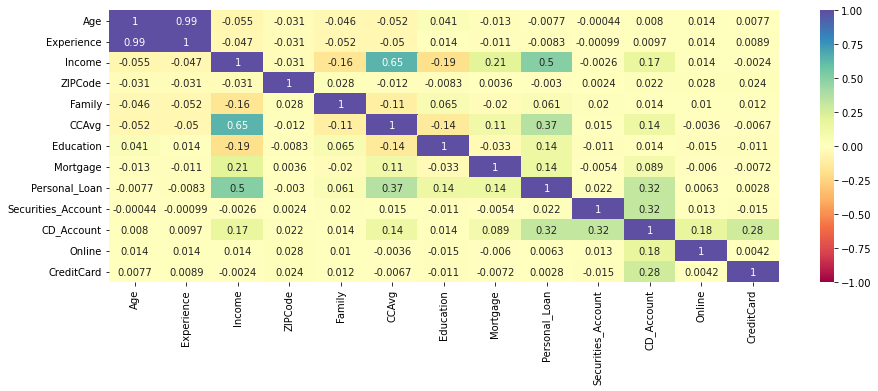

In [54]:
#Let us draw the correlation map
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral');

*   The highest correlation (0.99) exists between Age and Experience
*   CCAvg and Income have a moderate correlation of value 0.65






Since Age and Experience, both independent variables are highly correlated, we can drop one of the variables. Let us go ahead and drop the Experience variable as we still have zero values in this column. 

In [55]:
data.drop('Experience', axis=1, inplace=True)

Dropping the ZIPCode column due to the high number(450+) of unique values that can negatively impact the model performance. We will look into grouping the zipcodes and using it if we land in a situation where we need to increase model performance metrics. 

In [56]:
data.drop('ZIPCode', axis=1, inplace=True)

In [57]:
#Lets take another look at the data structure 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal_Loan       5000 non-null   int64  
 7   Securities_Account  5000 non-null   int64  
 8   CD_Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


We still have all the 5000 rows, 10 independent variables all containing numeric data.

# Data Preparation for Modeling

In [58]:
X = data.drop("Personal_Loan" , axis=1)
y = data.pop("Personal_Loan")
#Since all the variables are numerics, we can skip the pd.get_dummies/OneHotEncoding

In [59]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [60]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 10)
Shape of test set :  (1500, 10)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


**We had seen that around 90% of observations belong to class 0 (Customer did not accept the loan offered) and 9% observations belong to class 1 (Customers who accepted the loan offer from last year's campaign), and this ratio is preserved in the train and test sets.**

# Model Building

**Model Evaluation**

Model evaluation criterion

Model can make wrong predictions as:

Predicting a customer will not accept the loan but in reality, the customer will accept (FN)
Predicting a customer will accept the loan, but in reality the customer will not accept the loan (FP)
Which case is more important?

**False Negative** 
If we incorrectly predict that a customer will not accept the loan, it is loss of opportunity where a potential customer is lost. Identifying the potential customes is the goal of the model. 
**False Positive**
If we incorrectly predict that a customer will accept the loan, its loss of resources as the sales team will be targeting a customer who is not going to accept the loan.
**BottomLine** - We want the False Negatives to be at a minimum.

**The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.**

# Logistic Regression

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.
The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [62]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

To handle this imbalanced data set,we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the algorithm will give more weightage to class 1. 

In [63]:
# Fit the model on training data
modelL0 = LogisticRegression(solver='newton-cg',random_state=1,class_weight={0:0.15,1:0.85})
l0 = modelL0.fit(X_train, y_train)

In [64]:
log_odds = l0.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,-0.001286,0.050146,0.606779,0.23966,1.293978,0.00064,-0.732552,2.724553,-0.371333,-0.736186


**Coefficient interpretations**

Coefficients of Income, Family, CCAvg, Education, Mortgage and CD_Account Duration are positive, an increase in these will lead to an increase in chances of a customer accepting a loan.

Coefficients of Age, Security_Accoint, Online and CreidtCard are negative, an increase in these will lead to a decrease in chances of a customer accepting a loan.

**As per the Logisitic Regression Model, CD_Account, Education, Family are the attributes that have the most influence on the customer accepting the loan.**

**Converting coefficients to odds**
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [65]:
# converting coefficients to odds
odds = np.exp(l0.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(l0.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T


,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Odds,0.998714,1.051424,1.834513,1.270816,3.647268,1.000641,0.480681,15.249599,0.689814,0.478937
Change_odd%,-0.128560,5.142418,83.451317,27.081638,264.726809,0.064060,-51.931929,1424.959941,-31.018552,-52.106293


**Coefficient interpretations**

Age: Holding all other features constant, a unit change in Age will decrease the odds of a customer accepting a loan by 0.99 times or a 0.12% decrease in the odds.

**Education**: Holding all other features constant, a unit change in Education will increase the odds of a customer accepting a loan by 3.64 times or a 264.0% increase in the odds.

**CD_Account**: Holding all other features constant, a unit change in CD_Account will increase the odds of a customer accepting a loan by 15.24 times or a 1424.0% increase in the odds.

**Family**: Holding all other features constant, a unit change in Family will increase the odds of a customer accepting a loan by 1.83 times or a 83.45% increase in the odds.

**CreditCard**: Holding all other features constant, a unit change in CreditCard (issued by an outside bank) usage will decrease the odds of a customer accepting a loan by 0.47 times or a 52.1% decrease in the odds.





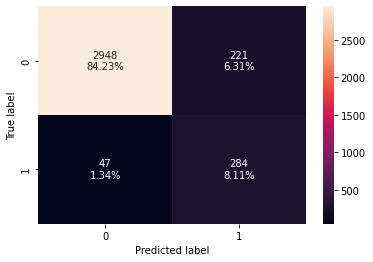

In [66]:
#Building the confusion matrix for the training set for modelL0 with a threshold of 0.5
confusion_matrix_sklearn_with_threshold(l0, X_train, y_train)

In [67]:
#Metrics on the training set with Threshold set to 0.5
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    l0, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.923429,0.858006,0.562376,0.679426


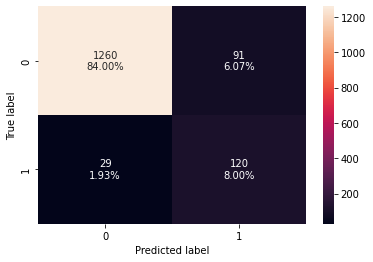

In [68]:
#Building the confusion matrix for the test set for modelL0 with the threshold of 0.5
confusion_matrix_sklearn_with_threshold(l0, X_test, y_test)

In [69]:
#Metrics on the test set with Threshold set to 0.5
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    l0, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.92,0.805369,0.56872,0.666667


**We got decent Recall values on both training(85.8) and test data(80.5). Let us see if we can find ways to increase the Recall rates and narrow the difference in Recall rates between the training and test data.**

# ROC-AUC


**ROC-AUC on training set**

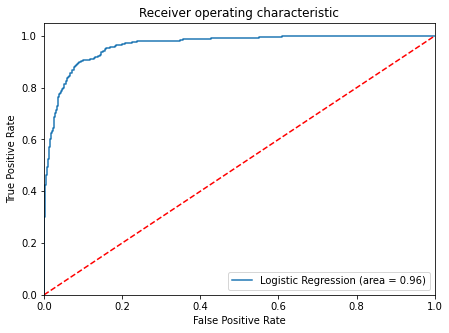

In [70]:
logit_roc_auc_train = roc_auc_score(y_train, l0.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, l0.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Optimal threshold using ROC-AUC curve**

In [71]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, l0.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)


0.41929814666782417


**Checking model performance on training set using the threshold of 0.41**

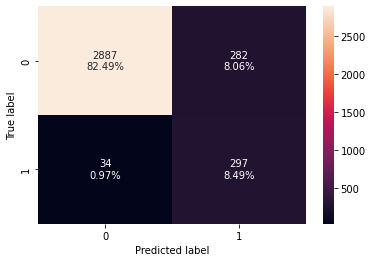

In [72]:
# creating confusion matrix on training date with the threshold set to 0.41
confusion_matrix_sklearn_with_threshold(
    l0, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [73]:
# checking model performance metrics on the training set
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    l0, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.909714,0.897281,0.512953,0.652747


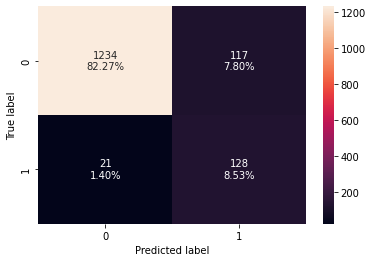

In [74]:
# creating confusion matrix on test data with the threshold set to 0.41
confusion_matrix_sklearn_with_threshold(
    l0, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [75]:
# checking model performance metrics on the test data with the threshold set to 0.41
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    l0, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc


Test set performance:


,Accuracy,Recall,Precision,F1
0,0.908,0.85906,0.522449,0.649746


**The Recall value has gone up in both training and test data sets - the threshold calculated from the ROC-AUC curve did yeild desired results.**

# Let's use Precision-Recall curve to calculate threshold and see if we can improve the Recall values any further.

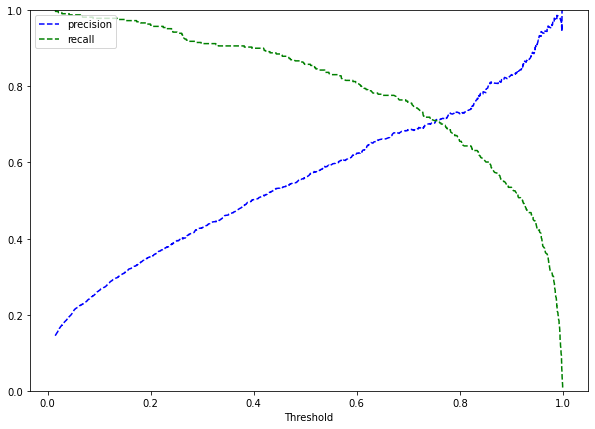

In [76]:
y_scores = l0.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At a threshold around 0.78, we will get equal precision and recall but taking a step back and selecting value around 0.75 will provide a higher recall and a good precision.

In [77]:
# setting the threshold
optimal_threshold_curve = 0.75

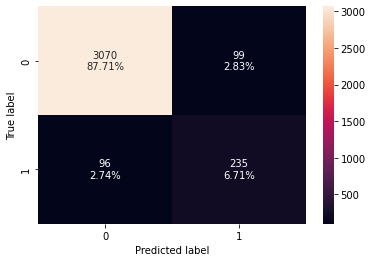

In [78]:
# creating confusion matrix on training date with the threshold set to 0.75
confusion_matrix_sklearn_with_threshold(
    l0, X_train, y_train, threshold=optimal_threshold_curve
)

In [79]:
# checking model performance on the training data with threshold set to 0.75
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    l0, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.944286,0.70997,0.703593,0.706767


Well, the recall value fell from 89 to 70, so not desired. However let's also look at the recall value of the test dataset.

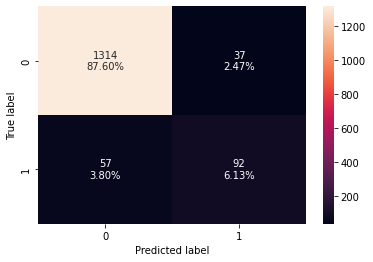

In [80]:
# creating confusion matrix on test data with the threshold set to 0.75
confusion_matrix_sklearn_with_threshold(
    l0, X_test, y_test, threshold=optimal_threshold_curve
)

In [81]:
# checking model performance on the test data with the threshold set to 0.75
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    l0, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.937333,0.61745,0.713178,0.661871


The threshold calculated from the curve returned higher Precision values, however there is a significant drop in the Recall values. So not ideal for our what we are trying to accomplish.

# Logistic Regression Model performance comparison

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.41 Threshold",
    "Logistic Regression-0.75 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.41 Threshold,Logistic Regression-0.75 Threshold
Accuracy,0.923429,0.909714,0.944286
Recall,0.858006,0.897281,0.709970
Precision,0.562376,0.512953,0.703593
F1,0.679426,0.652747,0.706767


In [83]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.41 Threshold",
    "Logistic Regression-0.75 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.41 Threshold,Logistic Regression-0.75 Threshold
Accuracy,0.920000,0.908000,0.937333
Recall,0.805369,0.859060,0.617450
Precision,0.568720,0.522449,0.713178
F1,0.666667,0.649746,0.661871


# Conclusion

The best Recall values (89.7 on training data & 85.9 on test data) were obtrained by using the Threshold(0.41) obtained from the ROC-AUC curve. The lowest recall values (70 on the training data and 61 on the test data) were from the threshold obtained from the Precision-Recall curve.

# Decision Tree

**Let us start out by building the basic Decision Tree (default)**

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [84]:
#Function to build a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [85]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [86]:
#Building a bare basic Decision Tree
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

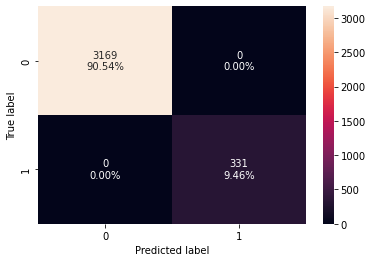

In [87]:
#Building the confusion matrix for the training set for model0
confusion_matrix_sklearn(model0, X_train, y_train)

In [88]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


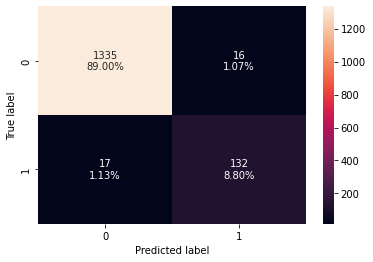

In [89]:
#Building the confusion matrix for the test set for model0
confusion_matrix_sklearn(model0, X_test, y_test)

In [90]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.978,0.885906,0.891892,0.888889


There is a 12% drop in the Recall rate between the training and test dataset indicating overfitting of data.

**Decision Tree (with class_weights)**
If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

class_weight is a hyperparameter for the decision tree classifier

In [91]:
#Building a DecisionTree setting the class_weight hyperparameter
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

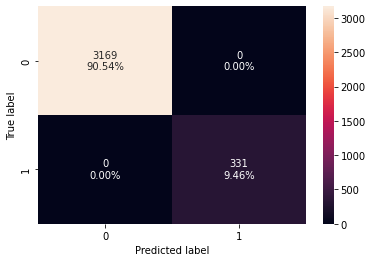

In [92]:
#Building the confusion matrix for the training set for model built with class_weight hyperparameter
confusion_matrix_sklearn(model, X_train, y_train)

In [93]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Model is able to perfectly classify all the data points on the training set.
0 errors on the training set, each sample has been classified correctly.
As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

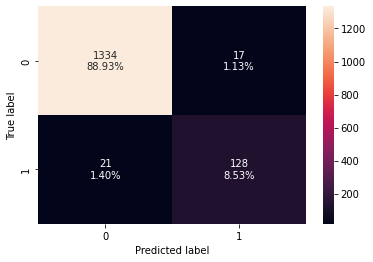

In [94]:
#Building the confusion matrix for the test set for model built with class_weight hyperparameter
confusion_matrix_sklearn(model, X_test, y_test)

In [95]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.85906,0.882759,0.870748


There is a 15% disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's try Pre-pruning**

# Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e We'll use Grid search.
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

In [96]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
#grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = GridSearchCV(estimator, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

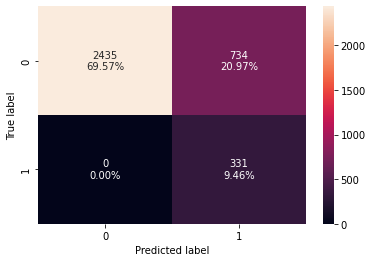

In [97]:
#Building the confusion matrix for the training set for model built with the best fit hyperparameters
confusion_matrix_sklearn(estimator, X_train, y_train)

In [98]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


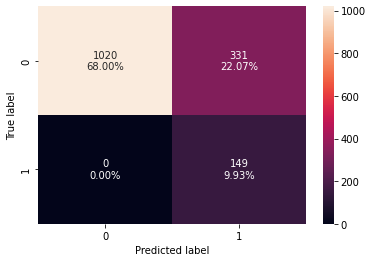

In [99]:
#Building the confusion matrix for the test set for model built with the best fit hyperparameters
confusion_matrix_sklearn(estimator, X_test, y_test)

In [100]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


The model is giving a generalized result now since the recall scores on both the train and test data are coming to be 1.0 which shows that the model is able to generalize really well on unseen data.

In [101]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

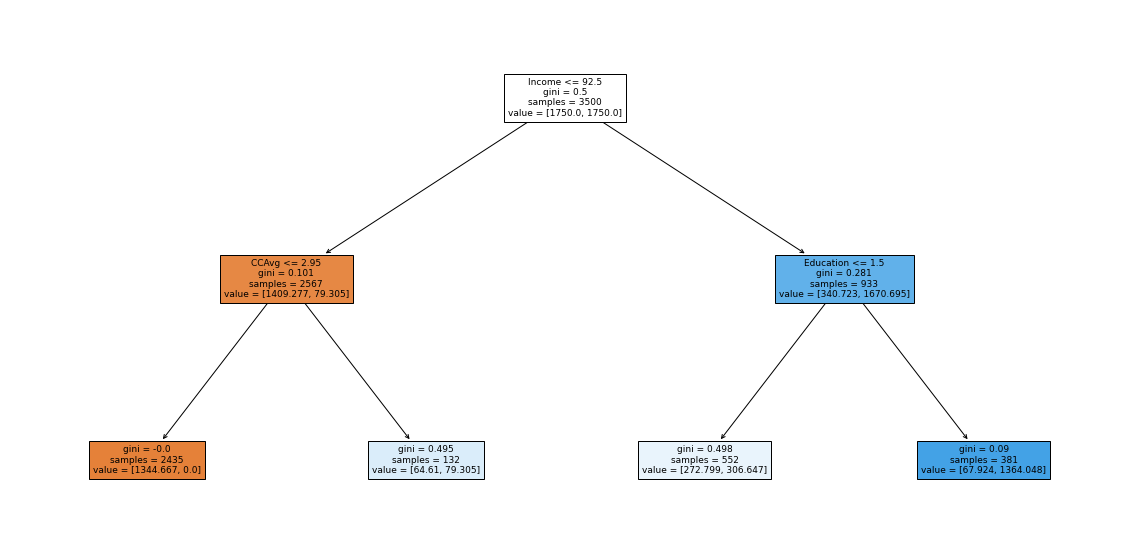

In [102]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [103]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



In [104]:
importances = estimator.feature_importances_
importances

array([0.        , 0.82007181, 0.        , 0.06262835, 0.11729984,
       0.        , 0.        , 0.        , 0.        , 0.        ])

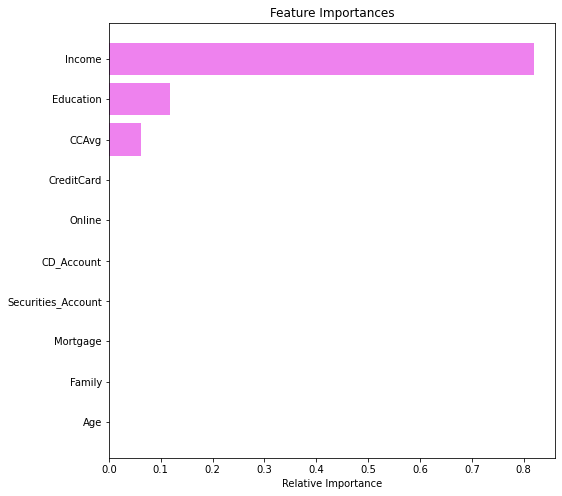

In [105]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Decision Tree (Post pruning)

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [106]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities


In [107]:
pd.DataFrame(path).shape

(41, 2)

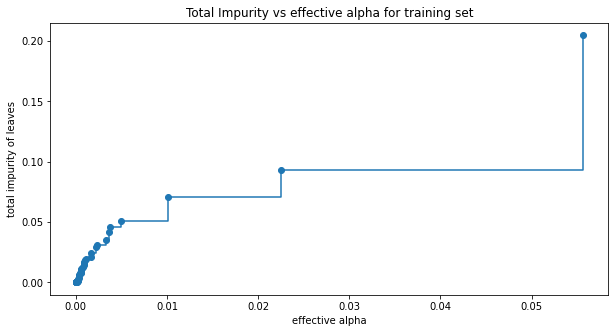

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [109]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923197


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

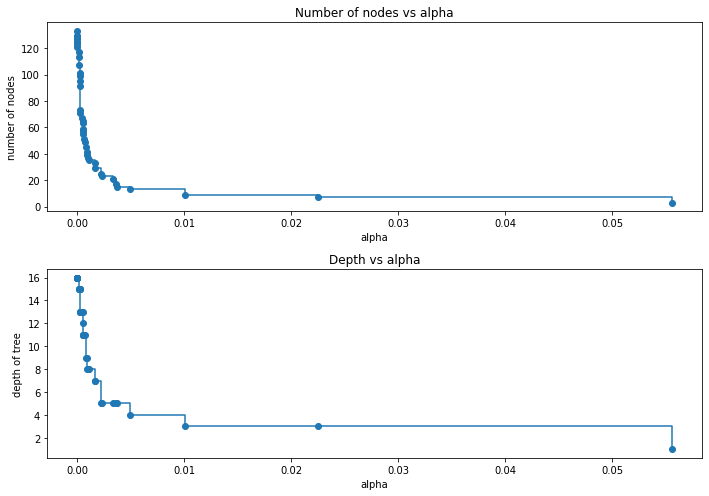

In [110]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [111]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [112]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [113]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

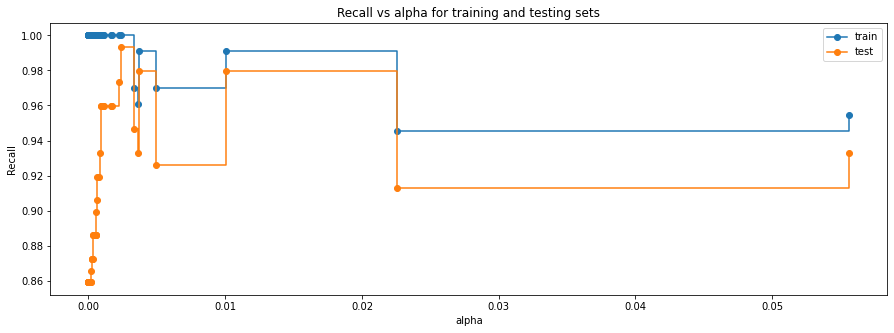

In [114]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [115]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002375808619774652, class_weight='balanced',
                       random_state=1)


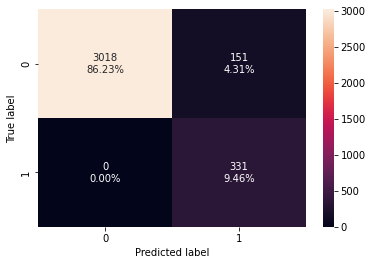

In [116]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [117]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


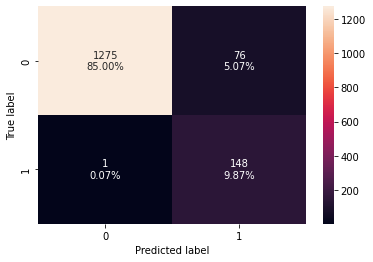

In [118]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [119]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are ~1 which shows that the model is able to generalize really well on unseen data.

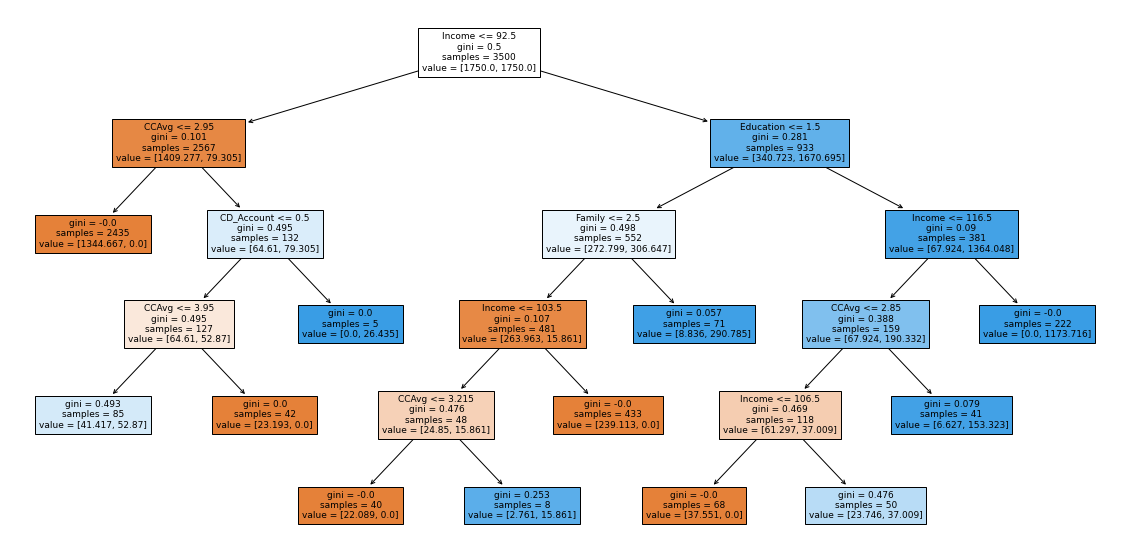

In [120]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [121]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [122]:
importances = best_model.feature_importances_
indices = np.argsort(importances)


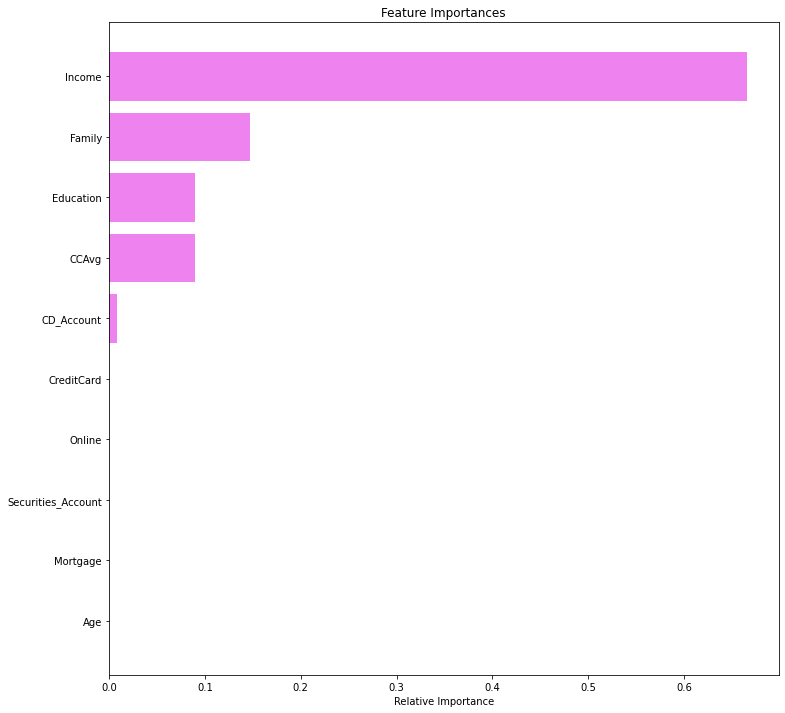

In [123]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Comparison of Decision Tree Models

In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [125]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.978000,0.974667,0.779333,0.948667
Recall,0.885906,0.859060,1.000000,0.993289
Precision,0.891892,0.882759,0.310417,0.660714
F1,0.888889,0.870748,0.473768,0.793566


# Comparisons - Logistic Regression vs Decision Tree

Comparing the results from the Logistic Regression Model with the results obtained from the Decision Tree, the Decision Tree Model with Pre-Pruning gave us the highest Recall value of 1 on both the training as well as the test data sets. The next best with the Recall rates was again the Decision Tree with Post-Pruning yeilding a Recall rate of 1 on the training data and 0.99 on the test data.

# Conclusions and Recommendations

**Conclusions**

We analyzed the Personal Loan campaign data using EDA and by using Logistic Regression and Decision Tree Classifier we tried to determine the likelihood of a Customer buying Loan.

First we built model using Logistic Regression and performance metric used was Recall. The most important features for classification were CD account,Education and Family.

Coefficient of Income, Education, Family, CCavg,CD account,Mortgage are positive, implying that a one unit increase in these will lead to increase in chances of a customer accepting a loan.

Coefficients of Age, Security_Accoint, Online and CreidtCard are negative, an increase in these will lead to a decrease in chances of a customer accepting a loan.

We also improved the performance using ROC-AUC curve and optimal threshold .This was the best Logistic REgression model with high recall.

Decision tree can easily overfit. Decision Trees require less datapreprocessing compared to logistic Regression and are easily interpreted.

We used decision trees with prepruning and post pruning techniques. The Pre-pruning model gave fantastic Recall values on both training and test data. 

As per the Decision Tree with Pre-Pruning - Income, Education and CC Avg are the most important variables in predicting if the customers will accept a personal loan.

**Recommendations**

Based on EDA, Logistic Regression and the Decision tree - Income ,Education,Family & CCavg are the most important factors in determining whether a customer will purchase the loan.

Customers who have income above $92.5k with an Advance/graduate level education, have higher chances of accepting personal loans. 

We can split our customer base into 3 profiles:

High Profile Clients : Higher income,Advanced/Graduate level education, 3 to 4 Family members with high monthly spending. The EDA pointed out that almost all customers with a Certified Deposit Account (CD_Account) with the bank, accepted the loan. So these customers too could be positioned as High Profile Clients. 

Medium Profile : Medium income group,Graduate level education and 3 to 4 member family with not so high monthly average spending

Low Profile: Lower income group, with undergrad degrees and 3 to 4 member families with low monthly spending.

In the marketing campaign, we could prioritize targeting the high profile clients - experienced sales/marketing reps could be assigned to these customers and make all efforts to pursue them into accepting the loan. Perhaps these customers can be pre-qualified for the loan. The second priority could be given to the medium profile customers.


